# CelebAMask-HQ dataset preparation

In [1]:
import pandas as pd
import numpy as np
import pathlib, re
import matplotlib.pyplot as plt
from PIL import Image
import json

## Building Dataframe

In [2]:
root = pathlib.Path('datasets').joinpath(pathlib.Path('CelebAMask-HQ'))
images_root = root.joinpath(pathlib.Path('CelebA-HQ-img'))
mask_root = root.joinpath(pathlib.Path('CelebAMask-HQ-mask-anno'))

mapping = {
    0: 'background',
    1: 'skin',
    2: 'nose',
    3: 'eye_g',
    4: 'l_eye',
    5: 'r_eye',
    6: 'l_brow',
    7: 'r_brow',
    8: 'l_ear',
    9: 'r_ear',
    10: 'mouth',
    11: 'u_lip',
    12: 'l_lip',
    13: 'hair',
    14: 'hat',
    15: 'ear_r',
    16: 'neck_l',
    17: 'neck',
    18: 'cloth'
}

unmapping = {value: key for key, value in mapping.items()}
color_mapping = {
    value : np.random.choice(256, size=3).tolist() for _, value in mapping.items() 
}

In [3]:
with open('mapping.json', 'w') as _mapping:
    json.dump(mapping, _mapping)

In [4]:
mask_directories = list(mask_root.glob('*'))[1:]
mask_paths = []
for mask_directory in mask_directories:
    masks = mask_directory.glob('*')
    mask_paths.extend(filter(lambda value: str(value).split('/')[-1] != '.DS_Store', masks))

df_masks = pd.DataFrame([{'mask_path': path} for path in mask_paths])
df_masks['image_path'] = df_masks['mask_path'].map(
    lambda value: images_root.joinpath(pathlib.Path(str(int(str(value).split('/')[-1].split('_')[0])) + '.jpg'))
)

In [5]:
image_groups = df_masks.groupby('image_path')
mask = next(iter(image_groups))[1]['mask_path'].iloc[0]
mask

PosixPath('datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno/0/00000_hair.png')

In [6]:
def extract_part(string: str):
    match = re.match(pattern=r'\d{5}_(?P<mask>\w*)\.png', string=string)
    result = match.group('mask')
    return result 

In [7]:
image_groups = df_masks.groupby('image_path')
new_dicts = []
for image_path, df_part in image_groups:
    keys = list(mapping.values())
    raw_masks = df_part['mask_path'].tolist()
    masks = [extract_part(str(value).split('/')[-1]) for value in raw_masks]
    _temp = {
        'image_path': image_path
    }
    for name in keys:
        mask_path = None
        for index, mask in enumerate(masks):
            if mask == name:
                mask_path = raw_masks[index]
                break
        _temp[name] = mask_path
    new_dicts.append(_temp)

In [8]:
df = pd.DataFrame(new_dicts)
df.head()

,image_path,background,skin,nose,eye_g,l_eye,r_eye,l_brow,r_brow,l_ear,r_ear,mouth,u_lip,l_lip,hair,hat,ear_r,neck_l,neck,cloth
0,datasets/CelebAMask-HQ/CelebA-HQ-img/0.jpg,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,None,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None
1,datasets/CelebAMask-HQ/CelebA-HQ-img/1.jpg,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,None,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...
2,datasets/CelebAMask-HQ/CelebA-HQ-img/10.jpg,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,None,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...
3,datasets/CelebAMask-HQ/CelebA-HQ-img/100.jpg,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,None,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...
4,datasets/CelebAMask-HQ/CelebA-HQ-img/1000.jpg,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,None,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...,datasets/CelebAMask-HQ/CelebAMask-HQ-mask-anno...


In [9]:
df.to_csv('celeb.csv', index=False)

## Viewing the results

In [10]:
def draw_masks(index: int, alpha: float = 0.8):
    entry = list(df_masks.groupby('image_path'))[index]
    image_path = entry[0]
    mask_paths = entry[1]['mask_path'].tolist()

    image = Image.open(image_path)
    result_mask = np.full(shape=(512, 512, 3), fill_value=(0, 0, 0), dtype=np.uint8)
    for mask_path in mask_paths:
        key = str(mask_path).split('/')[-1].split('_', maxsplit=1)[1].split('.')[0]
        color_image = np.full(shape=(512, 512, 3), fill_value=color_mapping[key]).astype(np.uint8)
        mask_skelet = np.asarray(Image.open(mask_path))
        mask = np.multiply(color_image, mask_skelet)
        result_mask = result_mask + mask

    mask = Image.fromarray(result_mask).resize(size=(1024, 1024))
    image = Image.blend(mask, image, alpha=alpha)

    plt.imshow(image)

    return mask

In [11]:
df_masks.to_csv('celeb.csv', index=False)

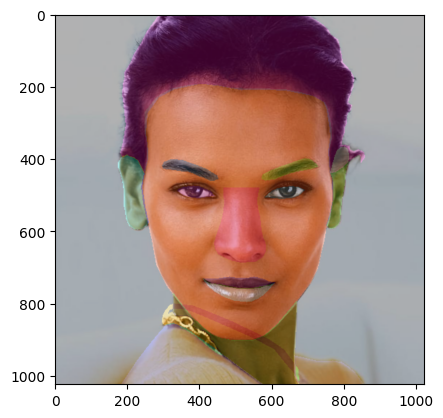

In [20]:
image = draw_masks(index=8, alpha=0.7)